# **Project Name**    -

Amazon Prime and TV Shows

##### **Project Type**    - EDA
##### **Contribution**    - Varsha Damakle

# **Project Summary -**

The dataset analyzed consists of metadata related to film and television content, covering aspects such as titles, genres, release years, IMDb scores, runtime durations, and key contributors like cast and crew. The primary goal of the analysis was to explore patterns in content type, audience ratings, production trends, and creator involvement to derive meaningful insights that can inform business and creative strategies, especially for streaming platforms.

In the initial stage, the dataset underwent comprehensive cleaning. Stringified list columns like genres and production_countries were converted into usable list objects using Python’s ast.literal_eval. Missing values in key columns such as imdb_score, runtimeMinutes, and release_year were handled, and extreme outliers were filtered to ensure reliable results. This preprocessing step made the dataset analysis-ready.

Univariate analysis provided a basic understanding of the content distribution. It was found that movies form the majority of the dataset, significantly outnumbering TV shows. A sharp increase in content production was noted post-2010, with a visible spike after 2016, likely driven by the streaming boom. IMDb scores largely ranged between 5 and 8, reflecting average to moderately good reception. Runtime distribution showed most titles fall within the 60 to 120-minute range, which is typical for mainstream films and limited series.

Bivariate analysis revealed interactions between variables. For instance, movies released in earlier years tended to have slightly higher IMDb scores, whereas newer content (especially after 2018) showed a marginal decline in average ratings, possibly due to rushed or oversaturated production. When comparing runtime to IMDb score, a sweet spot was observed around 90–120 minutes, suggesting that mid-length content tends to be better received. Scatter plots indicated that content with higher IMDb votes does not necessarily have higher ratings, hinting at the importance of balancing popularity with quality.

Multivariate charts brought deeper insights. A heatmap showing genre vs. type vs. score revealed that genres like Drama and Documentary are most popular, but their effectiveness varies by format. Documentaries perform well in show format, while Action and Thriller are stronger in movies. A violin plot illustrated that TV shows tend to have more consistent IMDb scores compared to movies, which showed a broader range and greater variation. Treemaps and stacked bar charts highlighted content concentration and genre-type pairings, offering clues about strategic production focus.

Insights from the credits data showed recurring appearances of certain actors, directors, and writers. However, these individuals’ presence did not always guarantee high scores, suggesting that while experienced creators add value, content quality relies on multiple factors, including scripting, production quality, and audience preferences.

From a business standpoint, the findings suggest a need to focus on quality over volume, particularly in recent years. There is clear value in investing in high-performing genre-type combinations and targeting underrepresented niches. Furthermore, the insights can guide promotional strategies by highlighting quality content that may not have garnered widespread attention.

In conclusion, the dataset provides a strong foundation for understanding content trends, audience preferences, and production dynamics. It supports the development of data-driven content strategies that prioritize audience satisfaction, creative efficiency, and long-term engagement

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset was created to analyze all shows available on Amazon Prime Video, allowing us to extract valuable insights such as:

Content Diversity: What genres and categories dominate the platform?

Regional Availability: How does content distribution vary across different regions?

Trends Over Time: How has Amazon Prime’s content library evolved?

IMDb Ratings & Popularity: What are the highest-rated or most popular shows on the platform?

By analyzing this dataset, businesses, content creators, and data analysts can uncover key trends that influence subscription growth, user engagement, and content investment strategies in the streaming industry.

#### **Define Your Business Objective?**

To leverage data-driven insights from the Amazon Prime Video content library to optimize content strategy, enhance viewer engagement, and drive subscriber growth by understanding content diversity, regional consumption patterns, evolving content trends, and the factors influencing content popularity (e.g., IMDb ratings).

This objective is derived directly from the "Problem Statement" in your image, which aims to:

Analyze all available shows on Amazon Prime Video.
Extract valuable insights regarding:
Content Diversity (dominant genres and categories).
Regional Availability (how content distribution varies across regions).
Trends Over Time (how Amazon Prime's content library has evolved).
IMDb Ratings & Popularity (what are the highest-rated or most popular shows).
By addressing these points, the business objective focuses on practical applications of the analysis to improve Amazon Prime Video's performance.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [17]:
credits_df = pd.read_csv("credits.csv")

In [15]:
titles_df = pd.read_csv("titles.csv")

### Dataset First View

In [40]:
print(credits_df)

        person_id         id           name      character      role
0           59401    ts20945     Joe Besser            Joe     ACTOR
1           31460    ts20945     Moe Howard            Moe     ACTOR
2           31461    ts20945     Larry Fine          Larry     ACTOR
3           21174    tm19248  Buster Keaton    Johnny Gray     ACTOR
4           28713    tm19248    Marion Mack  Annabelle Lee     ACTOR
...           ...        ...            ...            ...       ...
124230    1938589  tm1054116  Sangam Shukla         Madhav     ACTOR
124231    1938565  tm1054116   Vijay Thakur  Sanjay Thakur     ACTOR
124232     728899  tm1054116  Vanya Wellens        Budhiya     ACTOR
124233    1938620  tm1054116   Vishwa Bhanu          Gissu     ACTOR
124234    1938620  tm1054116   Vishwa Bhanu            NaN  DIRECTOR

[124235 rows x 5 columns]


In [42]:
print(titles_df)

             id                            title   type  \
0       ts20945                The Three Stooges   SHOW   
1       tm19248                      The General  MOVIE   
2       tm82253      The Best Years of Our Lives  MOVIE   
3       tm83884                  His Girl Friday  MOVIE   
4       tm56584                In a Lonely Place  MOVIE   
...         ...                              ...    ...   
9866   tm510327                     Lily Is Here  MOVIE   
9867  tm1079144  Jay Nog: Something from Nothing  MOVIE   
9868   tm847725                          Chasing  MOVIE   
9869  tm1054116                         Baikunth  MOVIE   
9870   ts275838                 Waking Up Eighty   SHOW   

                                            description  release_year  \
0     The Three Stooges were an American vaudeville ...          1934   
1     During America’s Civil War, Union spies steal ...          1926   
2     It's the hope that sustains the spirit of ever...          1946   

### Dataset Rows & Columns count

In [19]:
credits_df.shape

(124235, 5)

In [21]:
titles_df.shape

(9871, 15)

### Dataset Information

In [23]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


In [25]:
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

#### Duplicate Values

In [27]:
credits_df.duplicated().sum()

56

In [29]:
titles_df.duplicated().sum()

3

#### Missing Values/Null Values

In [31]:
credits_df.isna().sum()

person_id        0
id               0
name             0
character    16287
role             0
dtype: int64

In [33]:
titles_df.isna().sum()

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

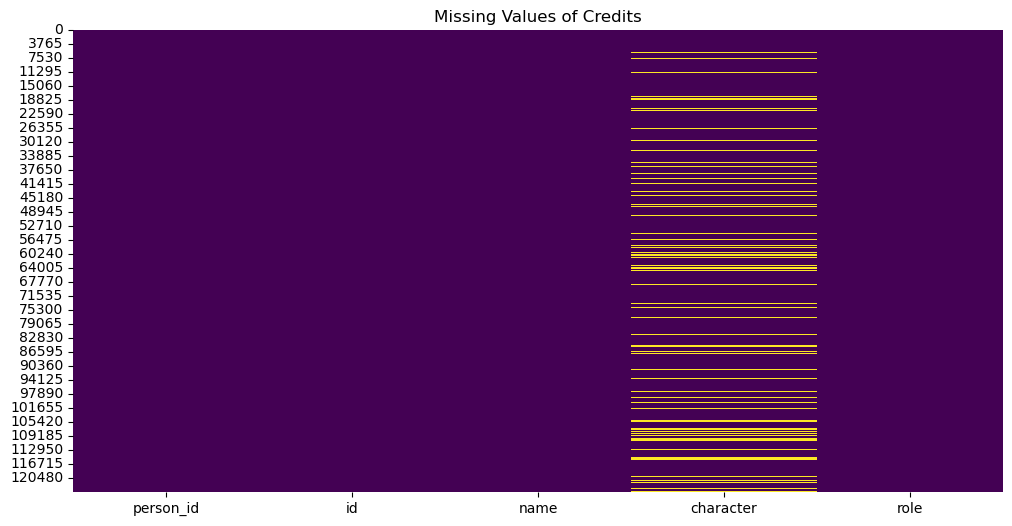

In [35]:
plt.figure(figsize=(12,6))
sns.heatmap(credits_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values of Credits')
plt.show()

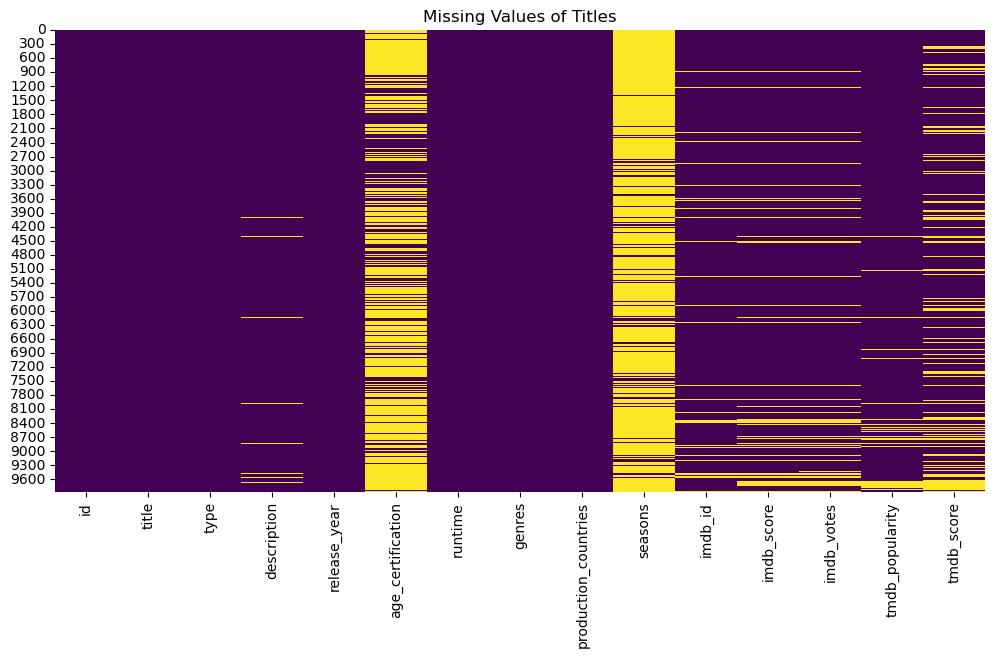

In [37]:
plt.figure(figsize=(12,6))
sns.heatmap(titles_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values of Titles')
plt.show()

# Understanding of Data

We have around 12 lakh values in credits DataFrame while approximately 10000 values in titles DataFrame. In the Credits we have person id, title id, name, character. We have various columns in titles which consists of title id, show name, discription, imbd rating, release year, no of seasons, imdb scoring, imdb voting, tmdb scoring, show type TV show or movie, genres.
Also we have seen the missing values and where most of the missing values lie in our dataset and which columns consist most missing values. As if we fill wrong missing values then our analysis will get effected and while visualizing we will not get accurate results.

## ***2. Understanding Your Variables***

In [46]:
credits_df.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [49]:
titles_df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

### Variables Description

# Credits DataFrame
- person_id : The person ID on JustWatch
- id : The title ID on JustWatch
- name : The actor or director's name
- character - The character name
- role : ACTOR or DIRECTOR

# Titles DataFrame
- id : The title ID on JustWatch
- title : The name of the title
- type : TV show or movie
- description : A brief description
- release_year : The release year
- age_certification : The age certification
- runtime : The length of the episode(SHOW) or movie
- genres : A list of genres
- production_countries : A list of countries that produced the title
- seasons : Number of seasons if it's a show
- imdb_id : The title id on IMDB
- imdb_score : Score on IMDB
- imdb_votes : Votes on IMDB
- tmdb_popularity : Popularity on TMDB
- tmdb_score : Score on TMDB

In [59]:
credits_df.describe()

,person_id
count,1.242350e+05
mean,4.064737e+05
std,5.616296e+05
min,1.000000e+00
25%,3.899200e+04
50%,1.339490e+05
75%,5.712560e+05
max,2.371153e+06


In [61]:
titles_df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.000000,9871.000000,1357.000000,8850.000000,8.840000e+03,9324.000000,7789.000000
mean,2001.327221,85.973052,2.791452,5.976395,8.533614e+03,6.910204,5.984247
std,25.810071,33.512466,4.148958,1.343842,4.592015e+04,30.004098,1.517986
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1995.500000,65.000000,1.000000,5.100000,1.170000e+02,1.232000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.625000e+02,2.536000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.236250e+03,5.634000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000


### Check Unique Values for each variable.

In [55]:
unique_vals = pd.DataFrame({
    'Column': credits_df.columns,
    'Unique Values': [credits_df[col].nunique() for col in credits_df.columns]
})
unique_vals

,Column,Unique Values
0,person_id,80508
1,id,8861
2,name,79758
3,character,71097
4,role,2


In [57]:
unique_vals_titles = pd.DataFrame({
    'Column': titles_df.columns,
    'Unique Values': [titles_df[col].nunique() for col in titles_df.columns]
})
unique_vals_titles

,Column,Unique Values
0,id,9868
1,title,9737
2,type,2
3,description,9734
4,release_year,110
5,age_certification,11
6,runtime,207
7,genres,2028
8,production_countries,497
9,seasons,32


## 3. ***Data Wrangling***

### Data Wrangling Code

In [67]:
titles_df.drop_duplicates(inplace = True)

In [69]:
credits_df.drop_duplicates(inplace = True)

In [71]:
import ast

list_columns = ['genres', 'production_countries']
for col in list_columns:
    titles_df[col] = titles_df[col].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

In [73]:
titles_df['release_year'] = pd.to_numeric(titles_df['release_year'], errors='coerce')

In [133]:
titles_df['runtimeMinutes'] = pd.to_numeric(titles_df['runtime'], errors='coerce')

# Insights Found

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

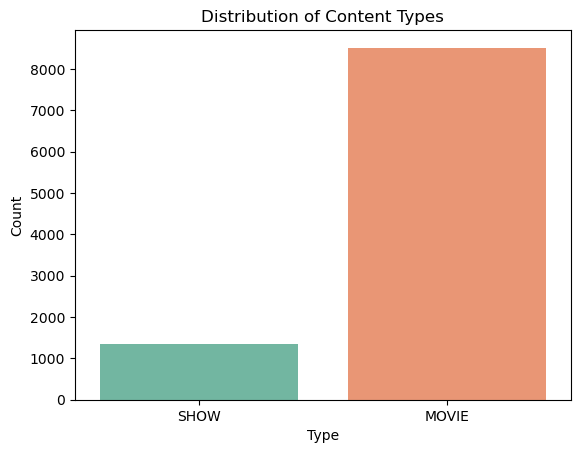

In [76]:
sns.countplot(data=titles_df, x='type', palette='Set2')
plt.title("Distribution of Content Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

It will show us the distribution of content on the platform which has been produced.

##### 2. What is/are the insight(s) found from the chart?

Movies availability is 6 times more as compared to shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

While movies help in acquiring users through popular titles, increasing the volume and quality of TV shows could boost user retention, drive binge behavior, and enhance LTV, which is critical in a subscription-driven model

#### Chart - 2

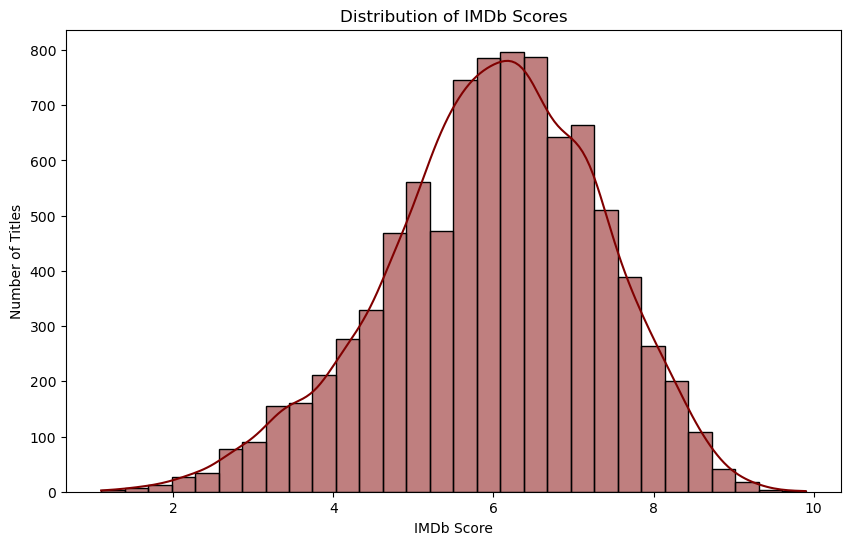

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(titles_df['imdb_score'].dropna(), kde=True, bins=30, color='maroon')
plt.title('Distribution of IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Number of Titles')
plt.show()

##### 1. Why did you pick the specific chart?

This histogram helps us understand how the content is rated on IMDb, giving an idea of quality perception from viewers.

##### 2. What is/are the insight(s) found from the chart?

- Most of the content clusters around a rating of 6 to 7.5, indicating average to good performance.
- A small number of titles are rated above 8.5, suggesting a few critically acclaimed or fan-favorite titles.
- Few very low-rated titles, showing content curation is generally of a decent standard.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Quality Focus: If most content lies in mid-range scores, Amazon may aim to increase high-rated content to enhance brand perception.
- Strategic Curation: Could remove or hide very low-rated content to maintain platform quality.
- User Trust: Promoting high-rated shows/movies can improve user retention and engagement.

#### Chart - 3

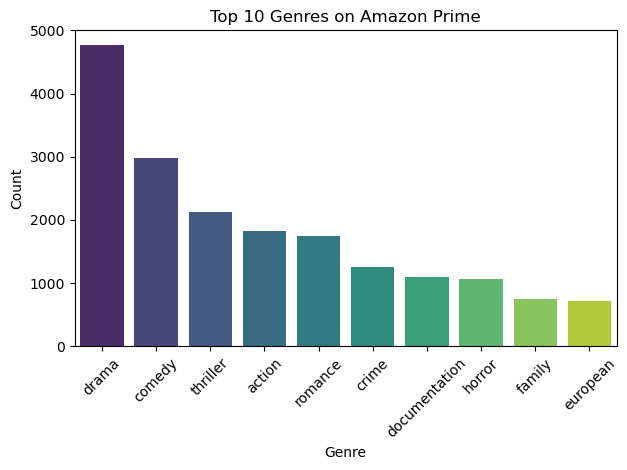

In [96]:
genre_exploded = titles_df.explode('genres')
genre_counts = genre_exploded['genres'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

sns.barplot(data=genre_counts.head(10), x='Genre', y='Count', palette='viridis')
plt.title("Top 10 Genres on Amazon Prime")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

- To understand genre preference by an audience.

##### 2. What is/are the insight(s) found from the chart?

- Drama, Comedy and Thriller are mostly preferred by audiences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- In future Prime can focus more on the drama comedy and thriller genres to keep their customers engaged.

#### Chart - 4

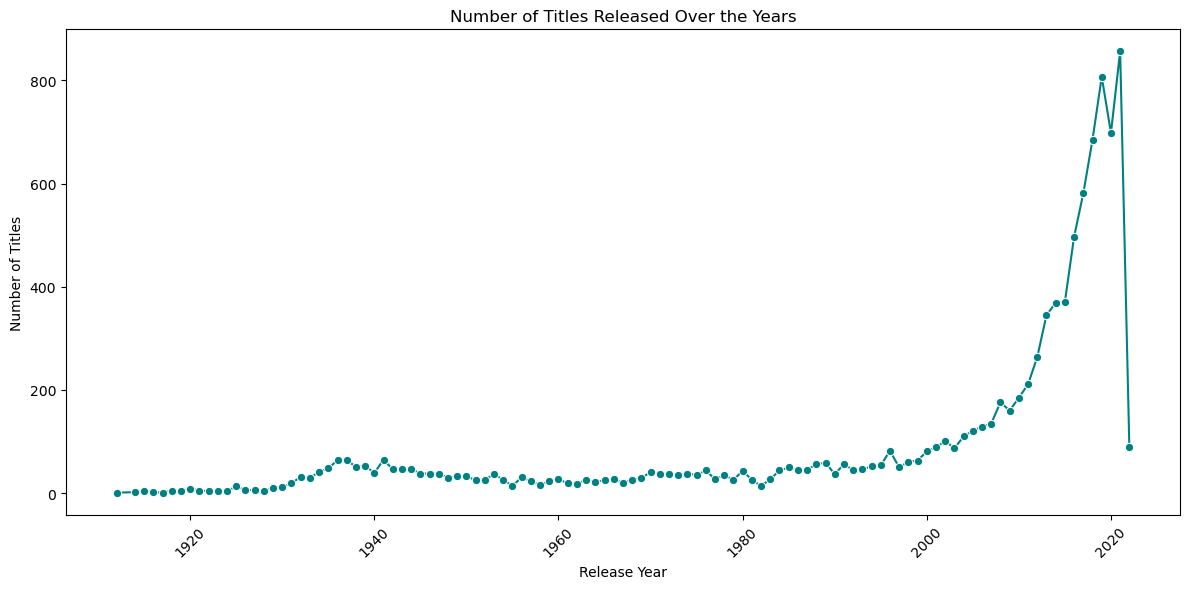

In [102]:
plt.figure(figsize=(12,6))
year_counts = titles_df['release_year'].value_counts().sort_index()
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='teal')
plt.title('Number of Titles Released Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

- To get clear picture about the releasing pattern over the years

##### 2. What is/are the insight(s) found from the chart?

- It is showing positive trend as the years are increasing,
- In the new digital era a platform like Amazon Prime is getting recognition and it is providing more content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- In year 2020 due to the pandemic there were no more shows to release.
- For situations like this Prime can reserve exclusive content to keep customers engaged or arrange some nostalagic quizes.

#### Chart - 5

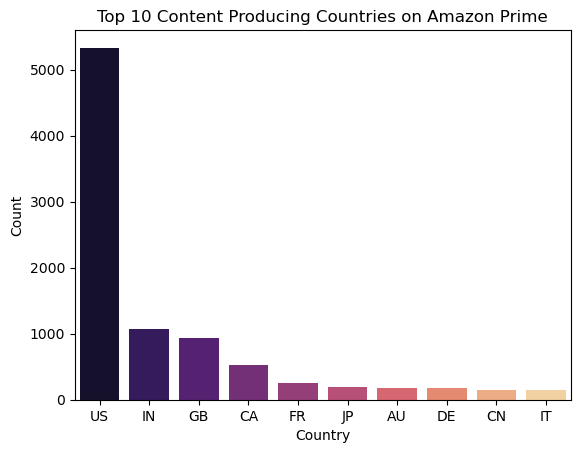

In [117]:
country_exploded = titles_df.explode('production_countries')
country_counts = country_exploded['production_countries'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

sns.barplot(data=country_counts.head(10), x='Country', y='Count', palette='magma')
plt.title("Top 10 Content Producing Countries on Amazon Prime")
plt.show()

##### 1. Why did you pick the specific chart?

- Helps understand Amazon Prime's growth in terms of content over the years.

##### 2. What is/are the insight(s) found from the chart?

- USA, India and Great Britain are the top content producing countries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- In future, Amazon Prime can invest more on this countries
- Also they can see which countries are getting consumed nowadays like Korean Dramas and Turkish Dramas.

#### Chart - 6

<Figure size 1400x700 with 0 Axes>

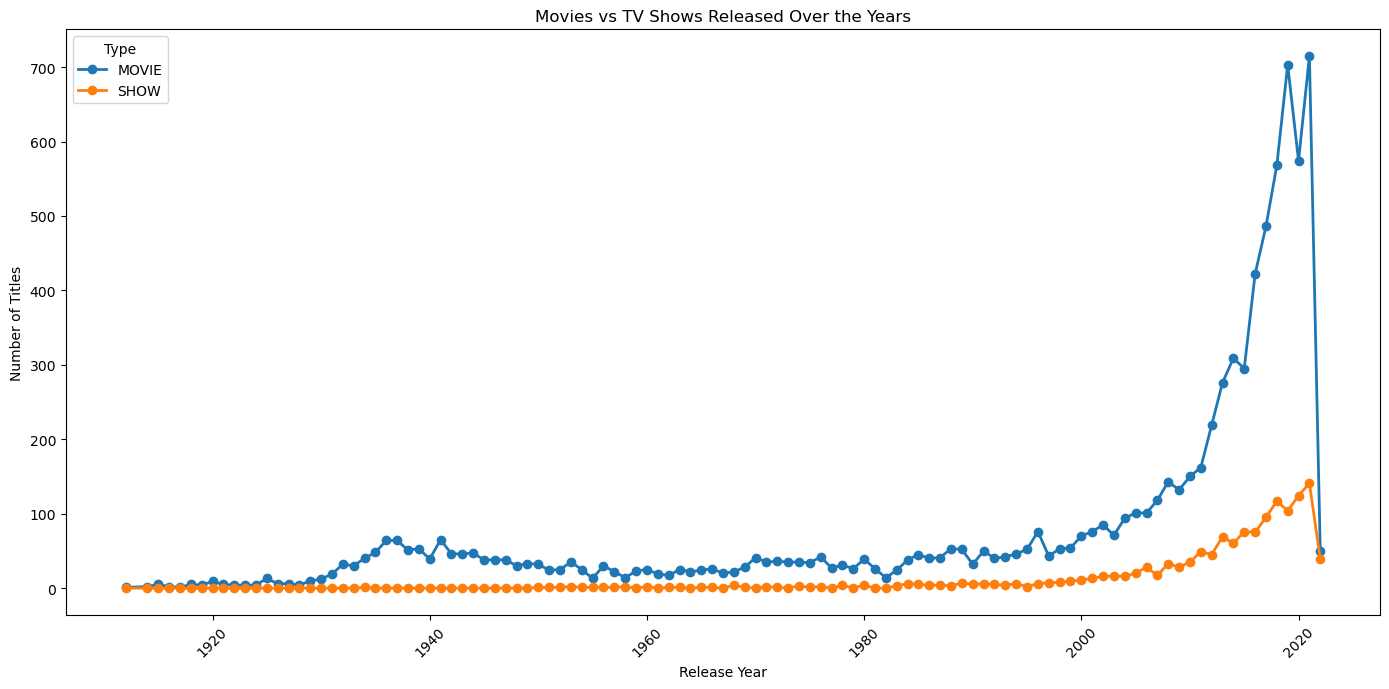

In [112]:
titles_df = titles_df.dropna(subset=['release_year', 'type'])
type_year_df = titles_df.groupby(['release_year', 'type']).size().unstack(fill_value=0)

plt.figure(figsize=(14,7))
type_year_df.plot(kind='line', marker='o', linewidth=2, figsize=(14,7))
plt.title('Movies vs TV Shows Released Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

- This chart shows which type (movie or show) dominates in which year.

##### 2. What is/are the insight(s) found from the chart?

- A sharp rise in shows during streaming boom years.
- A consistent stream of movies or dips due to production pauses

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Content Mix Optimization: If one type is lagging in production or popularity, adjustments can be made.
- Subscriber Value: TV shows generally retain users longer; movies can attract bursts of subscriptions.
- Strategic Focus: Helps Amazon decide where to invest – movies, series, or both.

#### Chart - 7

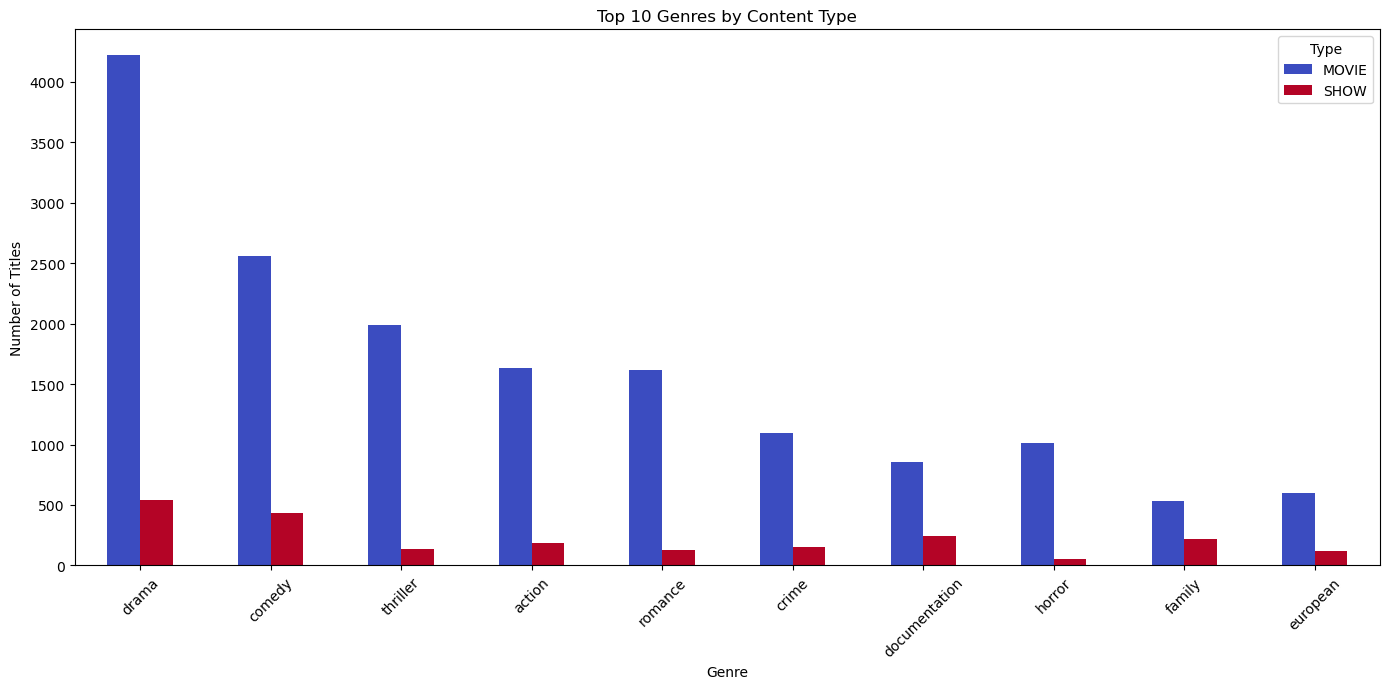

In [128]:
genre_exploded = genre_exploded.dropna(subset=['genres', 'type'])
genre_type_counts = genre_exploded.groupby(['genres', 'type']).size().unstack(fill_value=0)
top_genres = genre_exploded['genres'].value_counts().nlargest(10).index
genre_type_counts = genre_type_counts.loc[top_genres]

genre_type_counts.plot(kind='bar', figsize=(14,7), colormap='coolwarm')
plt.title('Top 10 Genres by Content Type')
plt.ylabel('Number of Titles')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

- Helps understand genre wise content distribution.

##### 2. What is/are the insight(s) found from the chart?

- Movies are seen to be dominating in each genre by great margin.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- For future we can add more content in well performing genres and keep viewrs engaged.

#### Chart - 8

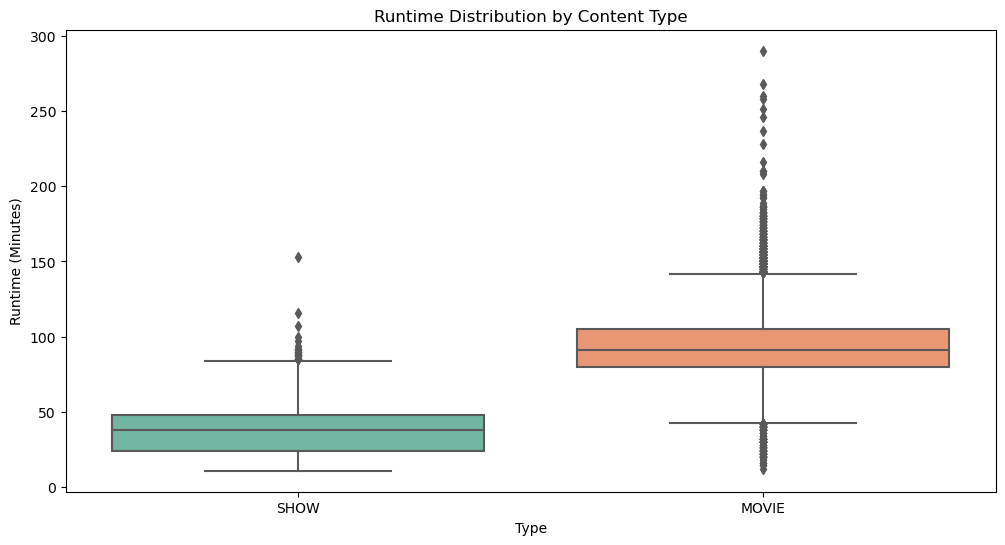

In [135]:
titles_df_filtered = titles_df[(titles_df['runtimeMinutes'] > 10) & (titles_df['runtimeMinutes'] < 300)]

plt.figure(figsize=(12,6))
sns.boxplot(x='type', y='runtimeMinutes', data=titles_df_filtered, palette='Set2')
plt.title('Runtime Distribution by Content Type')
plt.xlabel('Type')
plt.ylabel('Runtime (Minutes)')
plt.show()

##### 1. Why did you pick the specific chart?

- Boxplots reveal outliers and distribution spreads.

##### 2. What is/are the insight(s) found from the chart?

- Movies generally have longer runtimes.
- TV shows cluster around 20–60 minutes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Helps shape episode lengths or film durations.
- Runtime affects production cost and scheduling

#### Chart - 9

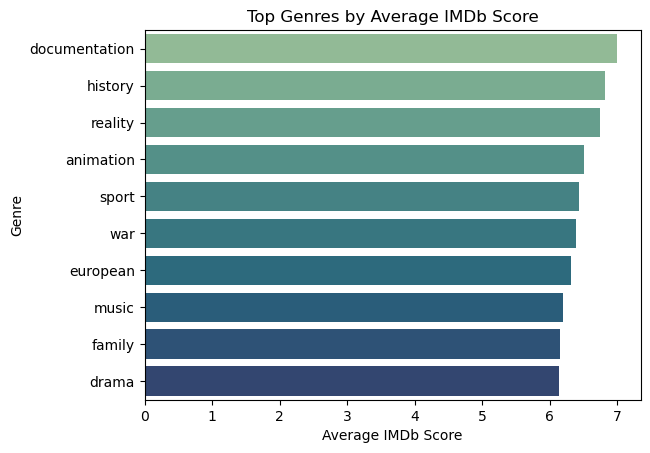

In [140]:
genre_scores = genre_exploded.groupby('genres')['imdb_score'].mean().sort_values(ascending=False).reset_index()

sns.barplot(data=genre_scores.head(10), x='imdb_score', y='genres', palette='crest')
plt.title("Top Genres by Average IMDb Score")
plt.xlabel("Average IMDb Score")
plt.ylabel("Genre")
plt.show()

##### 1. Why did you pick the specific chart?

- Helps to understand top genres with respect to average IMDB scores.

##### 2. What is/are the insight(s) found from the chart?

- Viewers are liking Documentation, History and Reality genres.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Investment should be done on top genres.
- Adding more content related to top performing genres.

#### Chart - 10

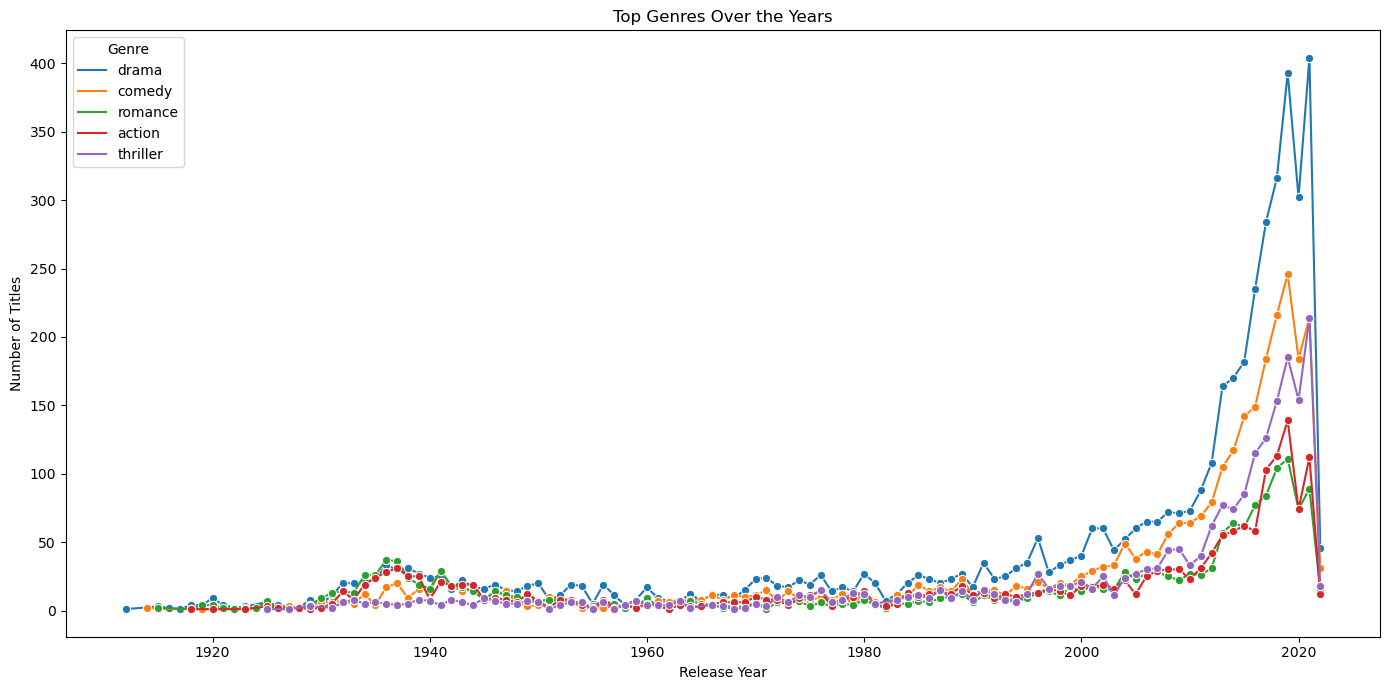

In [149]:
genre_year_df = titles_df.explode('genres')
top_genres = genre_year_df['genres'].value_counts().nlargest(5).index
genre_year_df = genre_year_df[genre_year_df['genres'].isin(top_genres)]
genre_trend = genre_year_df.groupby(['release_year', 'genres']).size().reset_index(name='count')

plt.figure(figsize=(14,7))
sns.lineplot(data=genre_trend, x='release_year', y='count', hue='genres', marker='o', palette='tab10')
plt.title('Top Genres Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

- Undrstanding genre production and release over the years.

##### 2. What is/are the insight(s) found from the chart?

- Drama and Comedy genres have high production and release over the years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Push trending genres more heavily in promotions.

#### Chart - 11

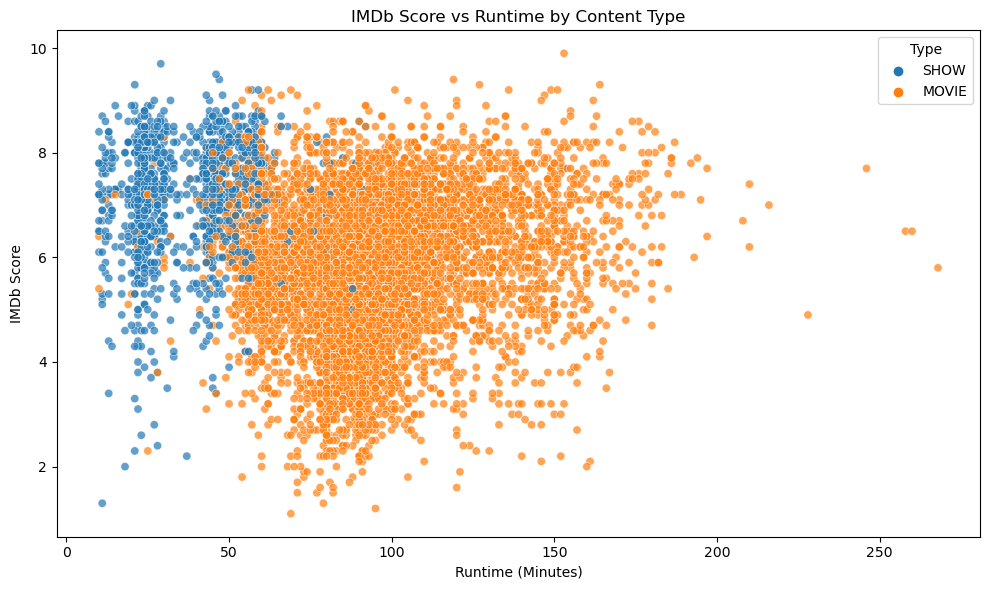

In [162]:
filtered_df = titles_df[
    (titles_df['runtimeMinutes'].between(10, 300)) & 
    (titles_df['imdb_score'].between(1, 10))
]

plt.figure(figsize=(10,6))
sns.scatterplot(data=filtered_df, x='runtimeMinutes', y='imdb_score', hue='type', alpha=0.7)
plt.title('IMDb Score vs Runtime by Content Type')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('IMDb Score')
plt.legend(title='Type')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

- Helps decide optimal runtime for high engagement.

##### 2. What is/are the insight(s) found from the chart?

- Optimal runtime should be between 100 to 150 minutes as they are getting above average ratings and keeps viewers engaged.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Identify runtime ranges that need quality improvement.

#### Chart - 12

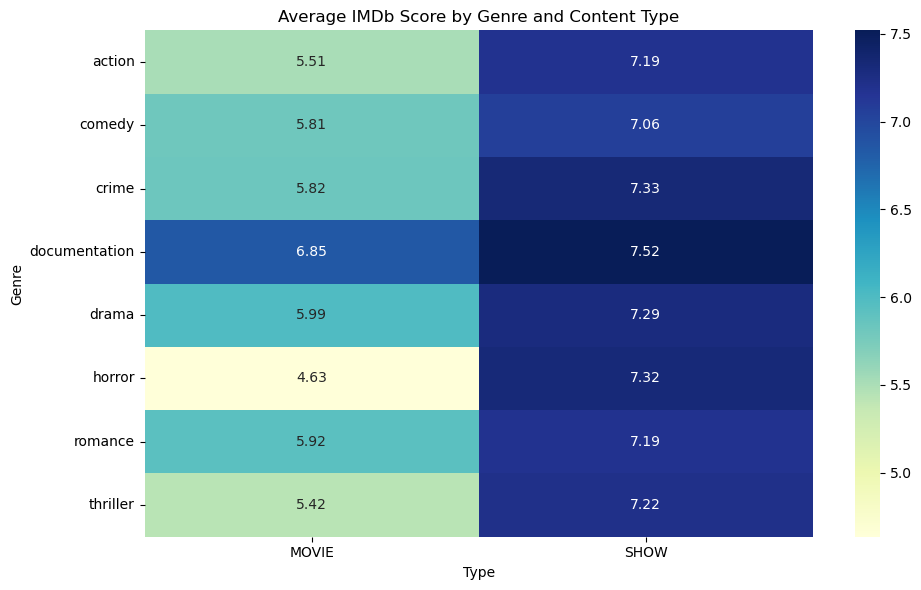

In [172]:
genre_rating_df = titles_df.explode('genres')
genre_rating_df = genre_rating_df[['genres', 'type', 'imdb_score']].dropna()
top_genres = genre_rating_df['genres'].value_counts().nlargest(8).index
genre_rating_df = genre_rating_df[genre_rating_df['genres'].isin(top_genres)]

pivot = genre_rating_df.pivot_table(values='imdb_score', index='genres', columns='type', aggfunc='mean')

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Average IMDb Score by Genre and Content Type')
plt.xlabel('Type')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

- To check if Content type is enhancing or diluting genre effectiveness.

##### 2. What is/are the insight(s) found from the chart?

- Documentation is getting good average scores in movie as well as show types followed by crime and drama.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Invest in producing certain genres specifically as movies or shows.
- Focus quality control efforts on underperforming genre-type combos.

#### Chart - 13

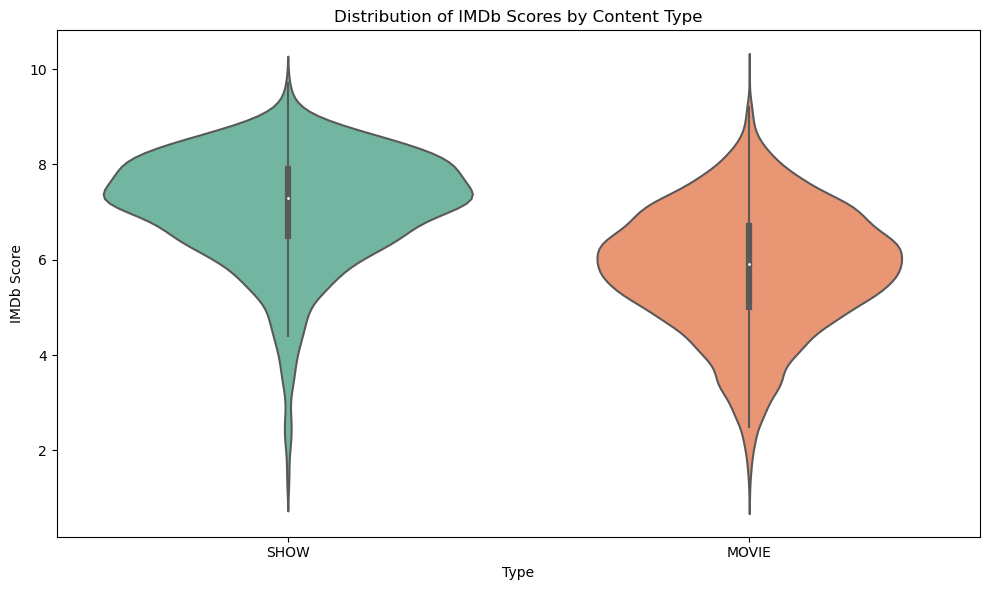

In [185]:
plt.figure(figsize=(10,6))
sns.violinplot(
    data=titles_df,
    x='type',
    y='imdb_score',
    inner='box', 
    palette='Set2'
)
plt.title('Distribution of IMDb Scores by Content Type')
plt.xlabel('Type')
plt.ylabel('IMDb Score')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

- To check how IMDB scores vary according to content type

##### 2. What is/are the insight(s) found from the chart?

- Shows are having high IMDB scores as compare to movie.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Wide spread in movie scores may suggest inconsistent quality — focus on improving production pipelines.

#### Chart - 14 - Correlation Heatmap

C:\Users\varsha\AppData\Local\Temp\ipykernel_15240\3722697055.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = corr_df.corr()


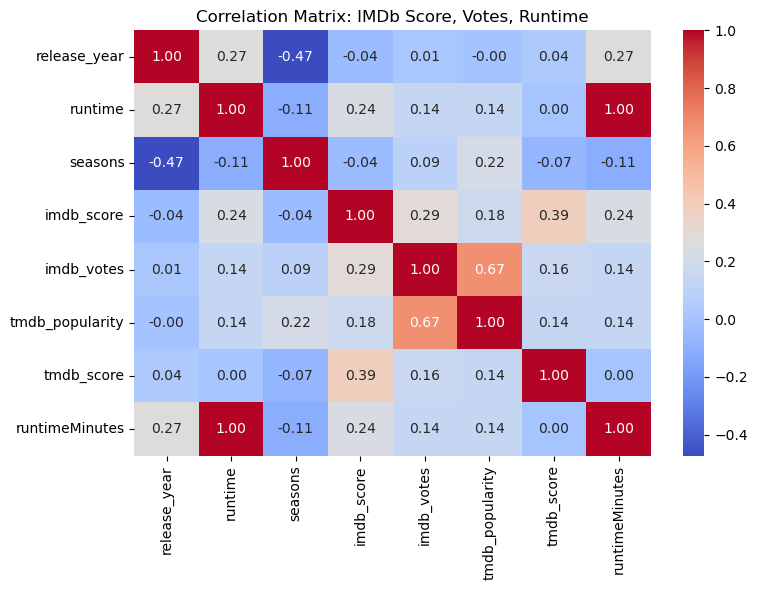

In [181]:
corr_df = titles_df.dropna()

corr_matrix = corr_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: IMDb Score, Votes, Runtime')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

- To check positive and negative relation between variables and see their dependency on each other.

##### 2. What is/are the insight(s) found from the chart?

- tmdb popularity and imdb votes have positive correlation as well as imdb votes and tmdb votes are also showing positive correlation.

#### Chart - 15 - Pair Plot

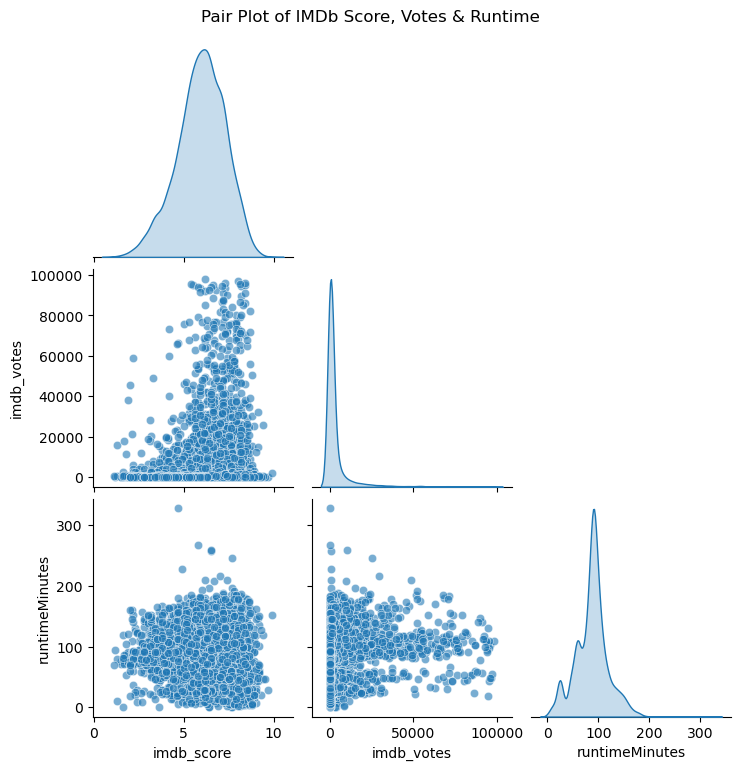

In [168]:
pair_df = titles_df[['imdb_score', 'imdb_votes', 'runtimeMinutes']]
pair_df = pair_df.dropna()

pair_df = pair_df[pair_df['imdb_votes'] < 1e5]

sns.pairplot(pair_df, diag_kind='kde', corner=True, plot_kws={'alpha':0.6})
plt.suptitle('Pair Plot of IMDb Score, Votes & Runtime', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

- For comparison of how positive and negative impact of them on each other.

##### 2. What is/are the insight(s) found from the chart?

# 1. IMDb Score vs IMDb Votes:
- Often shows a weak to moderate positive trend.
- Titles with more votes may tend to have more stable scores.
- Blockbusters may not always be top-rated, but have more exposure.

# 2. Runtime vs IMDb Score:
- Usually a wide spread.
- No strong linear trend — both short and long content can be rated well or poorly.

# 3. Runtime vs IMDb Votes:
- Medium to longer content often gets more votes.
- Possibly due to better promotion or broader release windows.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

The dataset reveals a growing, genre-diverse catalog with evolving viewer preferences and production patterns. By leveraging insights from content type, genre, IMDb metrics, and runtime, content platforms can enhance engagement, improve production strategies, and cater to niche audience segments more effectively.